In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets

import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
from torchvision import models


# There were issues with my certificate when downloading git cherry-pick <commit-hash>
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())


### Dataset Loading and Data Processing
Here we load the CIFAR10 dataset

In [26]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

batch_size = 4 # In the powerpoint slides it is 32?

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


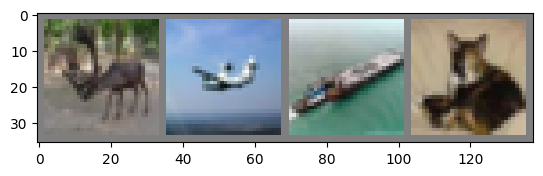

deer  plane ship  cat  


In [27]:
#functions to show an image
def imshow(img):
	img = img / 2 + 0.5 # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1,2,0)))
	plt.show()


#get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


## Define CNNs
We will be experimenting

In [ ]:
def get_device():
	if torch.cuda.is_available():
		return torch. device ('cuda' )
	elif torch.backends.mps.is_available():
		return torch.device ('mps')
	else:
		return torch.device('cpu')
	
device = get_device()	
model = models.vgg16().to(device)


# summary(model.to(device), (3, 224, 224))

def better_summary(model, input_size, batch_size=batch_size):
	"""A better 
	summary function that ensures device consistency between weights used for the VGG model"""
	# Get the device the model is on
	model_on_cpu = model.to('cpu')
	summary(model_on_cpu, input_size, batch_size=batch_size)
	# Move model back to original device
	model.to(device)

better_summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [4, 64, 224, 224]           1,792
              ReLU-2          [4, 64, 224, 224]               0
            Conv2d-3          [4, 64, 224, 224]          36,928
              ReLU-4          [4, 64, 224, 224]               0
         MaxPool2d-5          [4, 64, 112, 112]               0
            Conv2d-6         [4, 128, 112, 112]          73,856
              ReLU-7         [4, 128, 112, 112]               0
            Conv2d-8         [4, 128, 112, 112]         147,584
              ReLU-9         [4, 128, 112, 112]               0
        MaxPool2d-10           [4, 128, 56, 56]               0
           Conv2d-11           [4, 256, 56, 56]         295,168
             ReLU-12           [4, 256, 56, 56]               0
           Conv2d-13           [4, 256, 56, 56]         590,080
             ReLU-14           [4, 256,

## Define a MLP